Number of images in training data : 9866
Number of images in testing data : 3430
Bread 994
Dairy product 429
Dessert 1500
Egg 986
Fried food 848
Meat 1325
Noodles-Pasta 440
Rice 280
Seafood 855
Soup 1500
Vegetable-Fruit 709


C:\Users\Jiang\AppData\Local\Temp\ipykernel_10120\2824570536.py:71: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                             

308/308 [==============================] - ETA: 0s - loss: 1.1557 - accuracy: 0.6220WARNING:tensorflow:Can save best model only with val_loss available, skipping.


308/308 [==============================] - 2840s 9s/step - loss: 1.1557 - accuracy: 0.6220
Epoch 1/5
308/308 [==============================] - ETA: 0s - loss: 0.8519 - accuracy: 0.7225WARNING:tensorflow:Can save best model only with val_loss available, skipping.


308/308 [==============================] - 2571s 8s/step - loss: 0.8519 - accuracy: 0.7225
Epoch 2/5
308/308 [==============================] - ETA: 0s - loss: 0.7919 - accuracy: 0.7446WARNING:tensorflow:Can save best model only with val_loss available, skipping.


308/308 [==============================] - 2599s 8s/step - loss: 0.7919 - accuracy: 0.7446
Epoch 3/5
308/308 [==============================] - ETA: 0s - loss: 0.7246 - accuracy: 0.7636WARNING:tensorflow:Can save best model only with val_loss available, skipping.


308/308 [==============================] - 2581s 8s/step - loss: 0.7246 - accuracy: 0.7636
Epoch 4/5
308/308 [==============================] - ETA: 0s - loss: 0.6895 - accuracy: 0.7800WARNING:tensorflow:Can save best model only with val_loss available, skipping.


308/308 [==============================] - 2599s 8s/step - loss: 0.6895 - accuracy: 0.7800
Epoch 5/5
308/308 [==============================] - ETA: 0s - loss: 0.6632 - accuracy: 0.7852WARNING:tensorflow:Can save best model only with val_loss available, skipping.


308/308 [==============================] - 2590s 8s/step - loss: 0.6632 - accuracy: 0.7852


C:\Users\Jiang\AppData\Local\Temp\ipykernel_10120\2824570536.py:193: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluate = model.evaluate_generator(


107/107 [==============================] - 792s 7s/step - loss: 0.5249 - accuracy: 0.8359
Accuracy Test : 0.8358644843101501


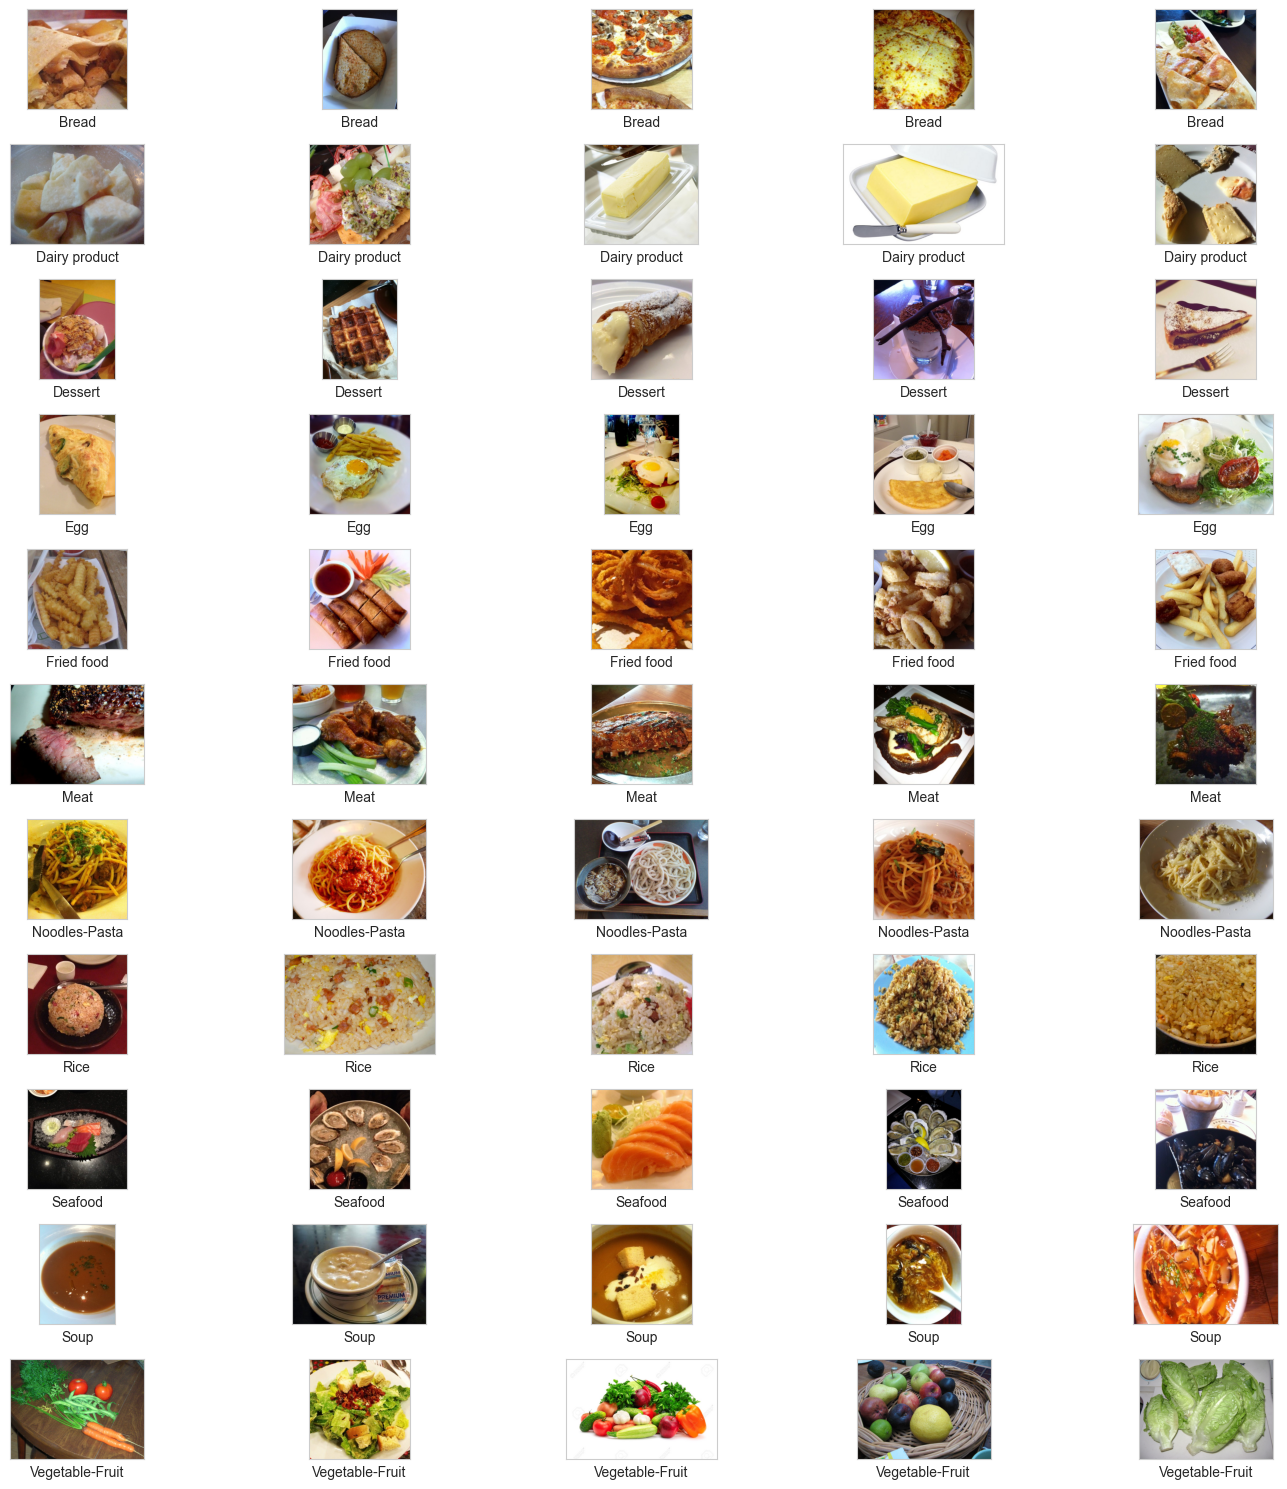

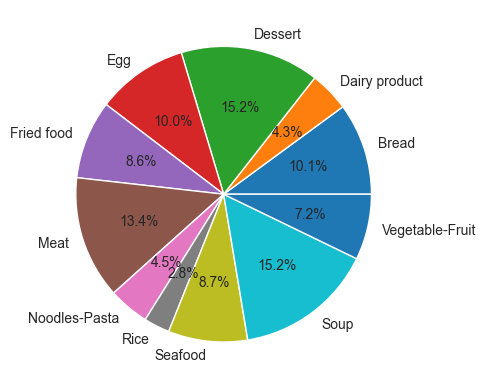

In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import random
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from random import sample

train = {}
test = {}

path = r"C:\Users\Jiang\flask-vue-crud\data\food11"

# Make dictionary storing images for each category under train data.
path_train = os.path.join(path, "training")
for i in os.listdir(path_train):
    train[i] = os.listdir(os.path.join(path_train, i))

# Make dictionary storing images for each category under test data.
path_test = os.path.join(path, "validation")
for i in os.listdir(path_test):
    test[i] = os.listdir(os.path.join(path_test, i))

# View the number of images in the entire training and testing datasets respectively.
len_train = np.concatenate(list(train.values())).shape[0]
len_test = np.concatenate(list(test.values())).shape[0]

print("Number of images in training data : {}".format(len_train))
print("Number of images in testing data : {}".format(len_test))

# Randomly display 5 images under each of the 6 categories from the training data.
# You will see different images each time.
fig, axs = plt.subplots(len(train.keys()), 5, figsize=(15, 15))
for i, item in enumerate(os.listdir(path_train)):
    images = sample(train[item], 5)

    for j, image in enumerate(images):
        img = PIL.Image.open(os.path.join(path_train, item, image))
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=item, xticks=[], yticks=[])
fig.tight_layout()

# View the number of images in each of the 6 categories in the training data.
for item in train.keys():
    print(item, len(train[item]))

# Make a pie-chart to visualize the percentage contribution of each category.
# This is often useful when you want your dataset to be balanced.
fig, ax = plt.subplots()
ax.pie(
    [len(train[item]) for item in train],
    labels = train.keys(),
    autopct = "%1.1f%%"
)
fig.show()
# Create an Image Generator and specify the type of data augmentation you want to apply.
# Here we go with zooming, flipping (horizontally and vertically), and rescaling.
train_datagen = ImageDataGenerator(
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    rescale=1./255
)

# For test data we only rescale the data.
# Never augment test data!!!
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator for the images.
# This will make images (including augmented ones) start flowing from the directory to the model.
# Note that augmented images are not stored along with the original images. The process happens in memory.

# Train generator
train_generator = train_datagen.flow_from_directory(
    path_train,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    path_test,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)
# Load the inception resnetv2 model
basemodel = InceptionResNetV2(
    weights = "imagenet",
    include_top = False, # Classification layer (output layer- sigmoid activations)
    input_tensor = Input((256, 256, 3))
)

# print the model summary
basemodel.summary()


# Freeze the basemodel weights, so these weights won't change during training
basemodel.trainable = False


# Add classification head to the model
headmodel = basemodel.output
headmodel = GlobalAveragePooling2D(name = "Global_Average_Pool")(headmodel)
headmodel = Flatten(name = "flatten")(headmodel)
headmodel = Dense(256, activation = "relu", name = "dense_1")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(128, activation = "relu", name = "dense_2")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(11, activation = "softmax", name = "output")(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)


# Compile the model
model.compile(
    loss = "categorical_crossentropy",
    optimizer = SGD(
        lr = 0.01,
        momentum = 0.9
    ),
    metrics = ["accuracy"]
)

# Using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(
    monitor = 'loss',
    verbose = 1,
    patience = 20
)

# save the best model with lower loss
checkpointer = ModelCheckpoint(
    filepath = "weights.hdf5",
    verbose = 1,
    save_best_only = True
)

# Finally, fit the neural network model to the data.
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.n // 32,
    epochs = 1,
    callbacks = [checkpointer, earlystopping]
)


# Unfreeze the weights in the base model, now these weights will be changed during training
basemodel.trainable = True
# Using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(
    monitor = 'loss',
    verbose = 1,
    patience = 20
)

# Save the best model with lower loss
checkpointer = ModelCheckpoint(
    filepath = "weights_fine.hdf5",
    verbose = 1,
    save_best_only = True
)




# fine tune the model with very low learning rate
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.n // 32,
    epochs = 5,
    callbacks = [checkpointer, earlystopping]
)

# Evaluate the performance of the model
evaluate = model.evaluate_generator(
    test_generator,
    steps = test_generator.n // 32,
    verbose = 1
)

print('Accuracy Test : {}'.format(evaluate[1]))

# Assigning label names to the corresponding indexes
labels = {
    0: 'Bread',
    1: 'Dairy product',
    2: 'Dessert',
    3: 'Egg',
    4: 'Fried food',
    5: 'Meat',
    6: 'Noodles-Pasta',
    7: 'Rice',
    8: 'Seafood',
    9: 'Soup',
    10: 'Vegetable-Fruit'
}


1/1 [==============================] - 0s 470ms/step


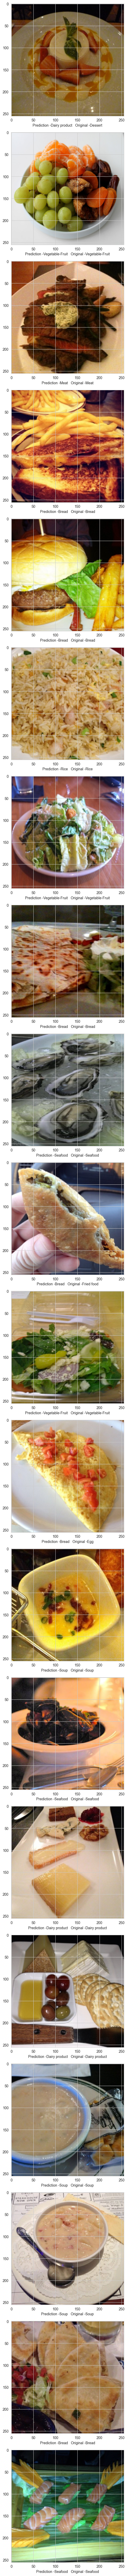

                 precision    recall  f1-score   support

          Bread       0.88      0.73      0.80       443
  Dairy product       0.72      0.70      0.71       151
        Dessert       0.79      0.82      0.80       482
            Egg       0.81      0.73      0.77       368
     Fried food       0.72      0.91      0.81       227
           Meat       0.85      0.87      0.86       425
  Noodles-Pasta       0.99      0.99      0.99       146
           Rice       0.97      0.98      0.97        95
        Seafood       0.85      0.92      0.88       278
           Soup       0.97      0.96      0.96       505
Vegetable-Fruit       0.94      0.96      0.95       227

       accuracy                           0.86      3347
      macro avg       0.86      0.87      0.86      3347
   weighted avg       0.86      0.86      0.86      3347


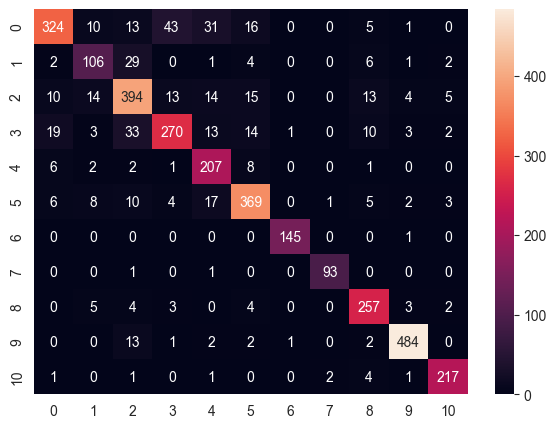

In [2]:

# Loading images and their predictions
prediction = []
original = []
image = []
count = 0
path_eval = r"C:\Users\Jiang\flask-vue-crud\data\food11\evaluation"
for i in os.listdir(path_eval):
    for item in os.listdir(os.path.join(path_eval, i)):
        #code to open the image
        img= PIL.Image.open(os.path.join(path_eval, i, item))
        #resizing the image to (256,256)
        img = img.resize((256,256))
        #appending image to the image list
        image.append(img)
        #converting image to array
        img = np.asarray(img, dtype= np.float32)
        #normalizing the image
        img = img / 255
        #reshaping the image in to a 4D array
        img = img.reshape(-1,256,256,3)
        #making prediction of the model
        predict = model.predict(img)
        #getting the index corresponding to the highest value in the prediction
        predict = np.argmax(predict)
        #appending the predicted class to the list
        prediction.append(labels[predict])
        #appending original class to the list
        original.append(i)

# Visualizing the results
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20,1,i+1)
    plt.xlabel("Prediction -" + prediction[j] +"   Original -" + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()


# Check out the Classification Report
print(classification_report(np.asarray(prediction), np.asarray(original)))

# Based on these values, you can try t improve your model.
# For the sake of simplicity, hyperparameter tuning and model improvement was not done.

# View the 6x6 confusion matrix
plt.figure(figsize = (7, 5))
cm = confusion_matrix(np.asarray(prediction), np.asarray(original))
sns.heatmap(
    cm,
    annot = True,
    fmt = "d"
)
plt.show()

In [5]:
# Specify the path and filename you want to save your model as:
model_save_path = r"C:\Users\Jiang\flask-vue-crud\model-re-image.keras"

# Save the entire model as a SavedModel.
model.save(model_save_path)

In [6]:
# Specify the path and filename you want to save your model as:
model_save_path = r"C:\Users\Jiang\flask-vue-crud\model-re-image.h5"

# Save the entire model as a SavedModel.
model.save(model_save_path)

C:\Users\Jiang\flask-vue-crud\env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
